


Flower Prediction Problem
dataset contains 4242 images of flowers
The pictures are divided into five classes
800 photos each - 320x240 pixels
This is a Multiclass Classification Problem.
Split into 60 and 40 ratio
Accuracy - 85% of higher. 

Objective - Flower recognition from given images. 


Import Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


Load Data while resizing and conversion to greyscale to optimize processing power. 

In [45]:
val_batch = 10
train_batch = 20
train_datagen = ImageDataGenerator(
rescale=1./255, shear_range=0.4, zoom_range=0.3, validation_split=0.4, horizontal_flip=True, )

train_data = train_datagen.flow_from_directory( '/content/drive/MyDrive/Colab Notebooks/flowers', target_size=(150, 150),
batch_size=train_batch, class_mode='categorical', subset = 'training', shuffle = True)

val_data = train_datagen.flow_from_directory( '/content/drive/MyDrive/Colab Notebooks/flowers', target_size=(150, 150),
batch_size=val_batch, class_mode='categorical', subset = 'validation', shuffle= True)

Found 2597 images belonging to 5 classes.
Found 1726 images belonging to 5 classes.


Data Analysis

In [46]:
print ('len train data', len(train_data))
print (val_data[1][1])

len train data 130
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [47]:
print ('len val data', len(val_data))

len val data 173


Label Data according to folder name

In [48]:
print (val_data.labels)

[0 0 0 ... 4 4 4]


In [49]:
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Model

After many experiments with layers and outputs. The best results were 49% accuracy with model below. 

As requirements were 85% accuracy it was decided to use a pre-trained model to meet the objective. 

In [11]:
"""
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))  
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=18,
                    batch_size=20,
                    validation_data = val_data)
"""

In [54]:
pretrained_model = tf.keras.applications.Xception(input_shape=[150,150, 3], include_top=False)
pretrained_model.trainable = True
model = Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.GlobalAveragePooling2D()) 
model.add(Dense(5, activation='softmax'))

In [55]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training

Due to high resource requirement. Model has been adjusted for optimum results in least epochs rather than re-train the model from scratch. 

In [56]:
with tf.device('/device:GPU:0'): 
  history = model.fit(train_data,
                    epochs=20,
                    batch_size=20,
                    validation_data = val_data)

Epoch 1/20
130/130 [==============================] - 46s 327ms/step - loss: 0.8913 - accuracy: 0.6669 - val_loss: 4.5411 - val_accuracy: 0.4687
Epoch 2/20
130/130 [==============================] - 42s 319ms/step - loss: 0.4853 - accuracy: 0.8397 - val_loss: 0.6326 - val_accuracy: 0.7735
Epoch 3/20
130/130 [==============================] - 41s 318ms/step - loss: 0.3951 - accuracy: 0.8633 - val_loss: 0.8421 - val_accuracy: 0.7497
Epoch 4/20
130/130 [==============================] - 42s 320ms/step - loss: 0.3239 - accuracy: 0.8882 - val_loss: 0.8255 - val_accuracy: 0.7428
Epoch 5/20
130/130 [==============================] - 42s 320ms/step - loss: 0.2853 - accuracy: 0.9080 - val_loss: 0.9286 - val_accuracy: 0.7990
Epoch 6/20
130/130 [==============================] - 42s 322ms/step - loss: 0.2468 - accuracy: 0.9031 - val_loss: 0.5843 - val_accuracy: 0.8320
Epoch 7/20
130/130 [==============================] - 42s 319ms/step - loss: 0.2106 - accuracy: 0.9329 - val_loss: 0.5727 - val_ac

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 10245     
Total params: 20,871,725
Trainable params: 20,817,197
Non-trainable params: 54,528
_________________________________________________________________


In [58]:
dict_keys = history.history.keys()
print (dict_keys)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Plotting the training and validation loss

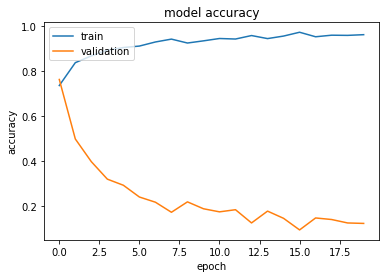

In [59]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['loss']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left') 
plt.show()

Plotting the training and validation accuracy

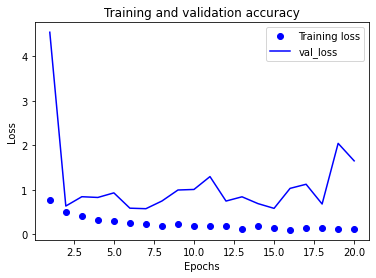

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Retrain Model

To curb overfitting. Epochs adjusted accordingly. 

In [68]:
pretrained_model = tf.keras.applications.Xception(input_shape=[150,150, 3], include_top=False)
pretrained_model.trainable = True
model = Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.GlobalAveragePooling2D()) 
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/device:GPU:0'): 
  history = model.fit(train_data,
                    epochs=15,
                    batch_size=20,
                    validation_data = val_data)

Epoch 1/15
130/130 [==============================] - 46s 326ms/step - loss: 0.8423 - accuracy: 0.6995 - val_loss: 1.5168 - val_accuracy: 0.6918
Epoch 2/15
130/130 [==============================] - 42s 319ms/step - loss: 0.5231 - accuracy: 0.8328 - val_loss: 1.7471 - val_accuracy: 0.6947
Epoch 3/15
130/130 [==============================] - 41s 319ms/step - loss: 0.4645 - accuracy: 0.8404 - val_loss: 0.7266 - val_accuracy: 0.7294
Epoch 4/15
130/130 [==============================] - 42s 320ms/step - loss: 0.3564 - accuracy: 0.8786 - val_loss: 0.5444 - val_accuracy: 0.8447
Epoch 5/15
130/130 [==============================] - 42s 319ms/step - loss: 0.3602 - accuracy: 0.8798 - val_loss: 0.8266 - val_accuracy: 0.8094
Epoch 6/15
130/130 [==============================] - 42s 321ms/step - loss: 0.3019 - accuracy: 0.9043 - val_loss: 0.5748 - val_accuracy: 0.8297
Epoch 7/15
130/130 [==============================] - 42s 320ms/step - loss: 0.2363 - accuracy: 0.9165 - val_loss: 0.6081 - val_ac

Evaluation

In [69]:
test_loss, test_acc = model.evaluate(val_data)
print ('test accuracy:', test_acc*100,'%')

173/173 [==============================] - 16s 89ms/step - loss: 0.7735 - accuracy: 0.8065
test accuracy: 80.64889907836914 %


# Prediction

In [72]:
predictions = model.predict(val_data)

In [73]:
print (model.predict (val_data)[4])

[2.1225961e-03 1.0140850e-05 2.7166650e-05 9.9751282e-01 3.2736894e-04]


In [75]:
print (model.predict (val_data)[4].sum())

1.0
